# Datenanalyse Seattle Library

In [1]:
import urllib.request
import pandas as pd
import matplotlib.pyplot as plt
import csv

## (1) Titel und Autor für meistausgeliehene Medien im Januar 2023

### Daten runterladen

Daten werden schon bei Abfrage bei der API gefiltert nach digitalen und physischen Medien, Entleihjahr und -monat und Mindestanzahl von Ausleihen. Die Mindestanzahl wurde durch Testen so ermittelt, dass die Ausgabe unter den maximal 10.000 Einheiten blieb.
Die Query wurde encoded mithilfe von [https://www.coderstool.com/querystring-encode](https://www.coderstool.com/querystring-encode)

In [2]:
# Query: Ausleihen im Januar 2023 von physischen Medien mit Ausleihzahl von mindestens 6
url = f"https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=usageclass='Physical'&checkoutyear=2023&checkoutmonth=01%20AND%20checkouts%3E6&$limit=10000"
local_file_phys = "physical_2023-01.csv"
urllib.request.urlretrieve(url, local_file_phys)

('physical_2023-01.csv', <http.client.HTTPMessage at 0x7f746c88fce0>)

In [3]:
# Query: Ausleihen im Januar 2023 von digitalen Medien mit Ausleihzahl von mindestens 8
url = "https://data.seattle.gov/resource/tmmm-ytt6.csv?$where=usageclass='Digital'&checkoutyear=2023&checkoutmonth=01%20AND%20checkouts%3E8&$limit=10000"
local_file_dig = "digital_2023-01.csv"
urllib.request.urlretrieve(url, local_file_dig)

('digital_2023-01.csv', <http.client.HTTPMessage at 0x7f746c88ff20>)

In [4]:
# Laden in Dateframes
df_physical = pd.read_csv(local_file_phys)
df_digital = pd.read_csv(local_file_dig)

In [5]:
df_physical.shape

(9975, 12)

In [6]:
df_digital.shape

(8867, 12)

### Die beiden meistausgeliehenen Objekte (physisch und digital)

In [7]:
max_phys_int = df_physical["checkouts"].max()
max_dig_int = df_digital["checkouts"].max()

In [8]:
print("Maximale Ausleihzahl eines physischen Objekts: " + str(max_phys_int))
print("Maximale Ausleihzahl eines digitalen Objekts: " + str(max_dig_int))

Maximale Ausleihzahl eines physischen Objekts: 2115
Maximale Ausleihzahl eines digitalen Objekts: 791


In [9]:
max_phys_row = df_physical.loc[df_physical["checkouts"] == max_phys_int]
max_dig_row = df_digital.loc[df_digital["checkouts"] == max_dig_int]

In [10]:
max_phys_row

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,isbn,creator,subjects,publisher,publicationyear
1123,Physical,Horizon,MIXED,2023,1,2115,Headphones / Seattle Public Library.,NaN,NaN,NaN,Seattle Public Library,NaN


In [11]:
max_dig_row

,usageclass,checkouttype,materialtype,checkoutyear,checkoutmonth,checkouts,title,isbn,creator,subjects,publisher,publicationyear
5137,Digital,OverDrive,AUDIOBOOK,2023,1,791,101 Essays That Will Change the Way You Think ...,9.781977e+12,Brianna Wiest,"Essays, Philosophy, Self-Improvement, Nonfiction","Tantor Media, Inc",2021


### Die zehn meistausgeliehenen physischen Objekte

In [12]:
ranking_checkouts_phys_series = df_physical["checkouts"].nlargest(10)

In [13]:
type(ranking_checkouts_phys_series)

pandas.core.series.Series

In [14]:
print(ranking_checkouts_phys_series)

1123    2115
4770     841
8074     485
2481     432
5942     426
4870     416
9268     416
9699     381
301      377
1176     373
Name: checkouts, dtype: int64


In [15]:
df_subset_most_checkouts_phys = df_physical.nlargest(10,"checkouts")
df_subset_most_checkouts_dig = df_digital.nlargest(10,"checkouts")

In [16]:
type(df_subset_most_checkouts_dig)

pandas.core.frame.DataFrame

### Die zehn meistgeliehenen physischen Objekte im Januar 2023 mit Art des Objekts, Titel, Urheber und Anzahl der Ausleihen

In [17]:
df_subset_most_checkouts_phys[["materialtype", "title", "creator", "checkouts"]]

,materialtype,title,creator,checkouts
1123,MIXED,Headphones / Seattle Public Library.,NaN,2115
4770,MIXED,SPL HotSpot : connecting Seattle / [distribute...,NaN,841
8074,BOOK,Spare / Prince Harry.,"Harry, Prince, Duke of Sussex, 1984-",485
2481,BOOK,Lessons in chemistry / Bonnie Garmus.,"Garmus, Bonnie",432
5942,BOOK,Our missing hearts : a novel / Celeste Ng.,"Ng, Celeste",426
4870,BOOK,I'm glad my mom died / Jennette McCurdy.,"McCurdy, Jennette, 1992-",416
9268,BOOK,The light we carry : overcoming in uncertain t...,"Obama, Michelle, 1964-",416
9699,BOOK,Dinner in one : exceptional & easy one-pan mea...,"Clark, Melissa",381
301,BOOK,Foster / Claire Keegan.,"Keegan, Claire",377
1176,BOOK,The passenger / Cormac McCarthy.,"McCarthy, Cormac, 1933-",373


### Die zehn meistgeliehenen digitalen Objekte im Januar 2023 mit Art des Objekts, Titel, Urheber und Anzahl der Ausleihen

In [18]:
df_subset_most_checkouts_dig[["materialtype", "title", "creator", "checkouts"]]

,materialtype,title,creator,checkouts
5137,AUDIOBOOK,101 Essays That Will Change the Way You Think ...,Brianna Wiest,791
441,AUDIOBOOK,"Braiding Sweetgrass: Indigenous Wisdom, Scient...",Robin Wall Kimmerer,729
1426,EBOOK,Lessons in Chemistry: A Novel,Bonnie Garmus,681
660,EBOOK,"Tomorrow, and Tomorrow, and Tomorrow: A novel",Gabrielle Zevin,667
5570,AUDIOBOOK,I'm Glad My Mom Died (unabridged),Jennette McCurdy,564
3172,AUDIOBOOK,Spare (unabridged),"Prince Harry, The Duke of Sussex",533
8709,AUDIOBOOK,A Court of Thorns and Roses: A Court of Thorns...,Sarah J. Maas,515
4457,EBOOK,Cloud Cuckoo Land: A Novel,Anthony Doerr,478
8171,AUDIOBOOK,"Tomorrow, and Tomorrow, and Tomorrow: A novel ...",Gabrielle Zevin,466
6541,EBOOK,The Last Thing He Told Me: A Novel,Laura Dave,440


### Visualisierung

In [19]:
%matplotlib inline

In [27]:
df_digital["publicationyear"]

0       2022
1       2022
2       2009
3       2022
4       2017
        ... 
8862    2022
8863    2016
8864    2020
8865    2018
8866    2022
Name: publicationyear, Length: 8867, dtype: int64

In [34]:
df_digital["publicationyear"].value_counts().sort_values(ascending=True).plot.bar()

<Axes: xlabel='publicationyear'>

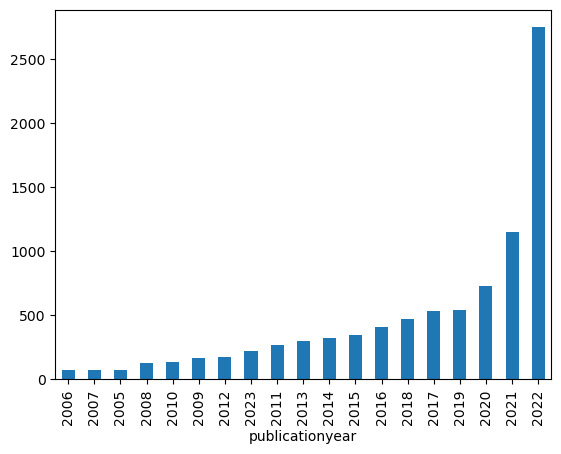

In [35]:
plt.show()

## (2) Wie viele Comics mit Erscheinungsjahr 2005 finden sich in der Collection? 

Zur Beantwortung der Frage sollen ein Ausschnitt des Library Collection Inventory und das ILS Data Dictionary kombiniert werden, um die Codes im ILS aufzulösen.

### ILS Data Dictionary laden

In [ ]:
url = "https://data.seattle.gov/resource/pbt3-ytbc.json"
local_file = "seattle_dd.json"
urllib.request.urlretrieve(url, local_file)

In [ ]:
df_data_dict = pd.read_json("seattle_dd.json")

In [ ]:
df_data_dict

### Load Library Collection Inventory

Versuch: Titel mit Erscheinungsjahr 2005 herunterzuladen, allerdings: in Feld publicationyear verschiedene Formatierungen für Druck/Erscheinungs/Copyrightjahr, deshalb ggf. nicht alles gefunden.
Vgl. https://data.seattle.gov/api/views/6vkj-f5xf/files/61a7279a-85fb-4061-8a65-6c09bb63ecbe?download=true&filename=Library%20Collection%20Inventory%20FAQs.pdf 

Herunterladen sollte eigentlich schrittweise erfolgen - aber der Versuch, über $order die Abfrage zu sortieren hat nicht funktioniert. 

Deshalb werden jetzt willkürlich einfach 50.000 Titel heruntergeladen.

In [ ]:
limit = 10000
offset = 0
base_url = "https://data.seattle.gov/resource/6vkj-f5xf.json"
#query = "?$where=publicationyear%20in%20(%272005%27,%20%27[2005]%27,%20%272005.%27,%27[2005].%27,%27[2005?]%27,%27[c2005.]%27,%27[p2005.]%27)&itemlocation='cen'"
query = "?$where=publicationyear%20in%20(%272005%27,%20%27[2005]%27,%20%272005.%27,%27[2005].%27,%27[2005?]%27,%27[c2005.]%27,%27[p2005.]%27)"
#order = "&$order=bibnum%20ASC"
order = ""
df_seattle_lci2005 = pd.DataFrame()
df_temp = pd.DataFrame()
#url = "https://data.seattle.gov/resource/6vkj-f5xf.json?$where=publicationyear%20in%20(%272005%27,%20%27[2005]%27)&$limit=20000"
#url = "https://data.seattle.gov/resource/6vkj-f5xf.json?&$limit=10000"
found_data = True
n = 0
#while found_data:
while found_data and n < 5:
    local_file = f"seattle-lci_{n}.json"
    limit_and_offset = f"&$limit={limit}&$offset={offset}"
    print(base_url+query+limit_and_offset+order)
    urllib.request.urlretrieve(base_url+query+limit_and_offset, local_file)
    offset += limit
    n += 1
    df_temp = pd.read_json(local_file)
    df_seattle_lci2005 = pd.concat([df_seattle_lci2005, df_temp])
    if df_temp.empty:
        print("leeres Datenset")
        found_data = False

In [ ]:
df_seattle_lci2005.shape

In [ ]:
df_seattle_lci2005 = df_seattle_lci2005.drop_duplicates()

In [ ]:
df_seattle_lci2005.shape

In [ ]:
df_seattle_lci2005 = df_seattle_lci2005.reset_index()

In [ ]:
df_seattle_lci2005["publicationyear"].unique()

In [ ]:
df_seattle_lci2005[pd.notnull(df_seattle_lci2005["itemcollection"])]

In [ ]:
lci_table_reduced = df_seattle_lci2005[["bibnum", "title", "author", "isbn", "itemcollection"]]

In [ ]:
df_seattle_lci2005.sort_values(["bibnum"])

In [ ]:
lci_table_reduced

In [ ]:
lci_tables_combined = pd.merge(lci_table_reduced, df_data_dict, left_on="itemcollection", right_on="code")

In [ ]:
lci_tables_combined

### Comics in der heruntergeladenen Auswahl an Titeln

In [ ]:
lci_tables_combined[lci_tables_combined["category_subgroup"]=="Comic"]

## (3) Welche der im Januar 2023 meistausgeliehenen physischen Objekte mit Erscheinungsjahr 2005 sind auf Kinder ausgerichtet?

### Kombination der Tabellen zu meistausgeliehenen Objekten, Data Dictionary und Auswahl der Titel mit Erscheinungsjahr 2005

In [ ]:
df_physical_reduced = df_physical[["materialtype","checkouts","title","creator","isbn","subjects"]]

In [ ]:
df_physical_reduced = df_physical_reduced.rename(columns= {"creator":"author"})

Inner Join wird durchgeführt auf der Kombination aus Autor, Titel und ISBN

In [ ]:
df_checkout_lci_dd_combined = pd.merge(lci_tables_combined, df_physical_reduced, how="inner", left_on=["author","title","isbn"], right_on=["author","title","isbn"])

In [ ]:
df_checkout_lci_dd_combined

## Physische Werke für Kinder mit Erscheinungsjahr 2005

In [ ]:
df_checkout_lci_dd_combined[df_checkout_lci_dd_combined["age_group"] == "Juvenile"]